In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("fruits.csv", usecols=["weight", "color","target"])
le = preprocessing.LabelEncoder() 
df.color = le.fit_transform(df.color)
df.target = le.fit_transform(df.target)

In [3]:
X = df[["weight","color"]]
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=3, bootstrap_features=True)

In [5]:
bc.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  bootstrap_features=True, n_estimators=3)

In [6]:
bc.estimators_features_

[array([0, 1]), array([1, 1]), array([0, 0])]

[Text(167.4, 181.2, 'X[1] <= 1.5\ngini = 0.5\nsamples = 4762\nvalue = [3804, 3696]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\ngini = 0.417\nsamples = 3150\nvalue = [1459, 3469]'),
 Text(41.85, 36.23999999999998, 'gini = 0.175\nsamples = 1044\nvalue = [1459, 157]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 2106\nvalue = [0, 3312]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 90.1\ngini = 0.161\nsamples = 1612\nvalue = [2345, 227]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 594\nvalue = [933, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.239\nsamples = 1018\nvalue = [1412, 227]')]

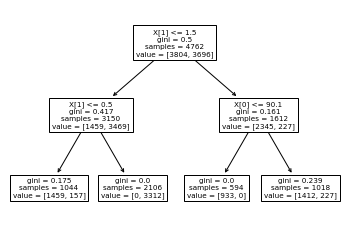

In [7]:
tree.plot_tree(bc.estimators_[0])

[Text(200.88000000000002, 181.2, 'X[1] <= 1.5\ngini = 0.5\nsamples = 4707\nvalue = [3782, 3718]'),
 Text(133.92000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.414\nsamples = 3080\nvalue = [1433, 3467]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.172\nsamples = 1003\nvalue = [1433, 150]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2077\nvalue = [0, 3317]'),
 Text(267.84000000000003, 108.72, 'gini = 0.174\nsamples = 1627\nvalue = [2349, 251]')]

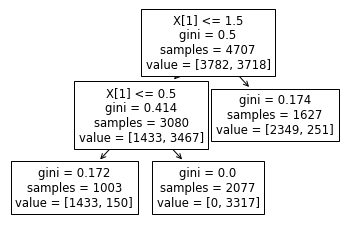

In [8]:
tree.plot_tree(bc.estimators_[1])

[Text(133.92000000000002, 181.2, 'X[1] <= 90.002\ngini = 0.5\nsamples = 4753\nvalue = [3834, 3666]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 996\nvalue = [1584, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 110.0\ngini = 0.471\nsamples = 3757\nvalue = [2250, 3666]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.276\nsamples = 2800\nvalue = [726, 3666]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 957\nvalue = [1524, 0]')]

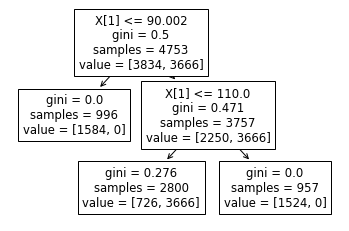

In [9]:
tree.plot_tree(bc.estimators_[2])

In [10]:
dtc.fit(X_train, y_train)
pred_train = dtc.predict_proba(X_train)[:, 1]
pred_test = dtc.predict_proba(X_test)[:, 1]
score_train = roc_auc_score(y_train, pred_train)
score_test = roc_auc_score(y_test, pred_test)
print(score_train, score_test)
#2 0.9618597923456943
#3 0.9852814376934589
#4 0.9896073555336901
#5 0.9897108111432261
#6 0.9882140679130025
#7 0.9875158226226348
#100 0.9275452001721912


NameError: name 'dtc' is not defined

In [ ]:
tree.plot_tree(dtc)

In [ ]:
tree.plot_tree(dtc)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6), n_estimators=20, learning_rate=0.1)

In [ ]:
adb.fit(X_train, y_train)

In [ ]:
adb.estimators_

In [ ]:
for i in range(20):
    pred_train = adb.estimators_[i].predict_proba(X_train)[:,1]
    score_train = roc_auc_score(y_train, pred_train)
    pred_test = adb.estimators_[i].predict_proba(X_test)[:,1]
    score_test = roc_auc_score(y_test, pred1)
    print(score_train, score_test)

In [ ]:
pred_test = adb.predict_proba(X_test)[:,1]
score_test = roc_auc_score(y_test, pred1)
print(score_test)

In [11]:
import xgboost

In [14]:
xgb = xgboost.XGBClassifier(n_estimators=1000000, max_depth=6, learning_rate=0.1, early_stopping_rounds=10)

In [16]:
xgb.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)], verbose=True)

[0]	validation_0-logloss:0.61109	validation_1-logloss:0.61156
[1]	validation_0-logloss:0.54385	validation_1-logloss:0.54474
[2]	validation_0-logloss:0.48776	validation_1-logloss:0.48903
[3]	validation_0-logloss:0.44033	validation_1-logloss:0.44200
[4]	validation_0-logloss:0.39979	validation_1-logloss:0.40182
[5]	validation_0-logloss:0.36487	validation_1-logloss:0.36727
[6]	validation_0-logloss:0.33460	validation_1-logloss:0.33734
[7]	validation_0-logloss:0.30818	validation_1-logloss:0.31127
[8]	validation_0-logloss:0.28505	validation_1-logloss:0.28843
[9]	validation_0-logloss:0.26469	validation_1-logloss:0.26842
[10]	validation_0-logloss:0.24671	validation_1-logloss:0.25077
[11]	validation_0-logloss:0.23080	validation_1-logloss:0.23516
[12]	validation_0-logloss:0.21667	validation_1-logloss:0.22132
[13]	validation_0-logloss:0.20404	validation_1-logloss:0.20898
[14]	validation_0-logloss:0.19284	validation_1-logloss:0.19803
[15]	validation_0-logloss:0.18285	validation_1-logloss:0.18830
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
pred_test = xgb.predict_proba(X_test)
score_test = roc_auc_score(y_test, pred1)
print(score_test)